<a href="https://colab.research.google.com/github/Johnny-DF26/Machine_Learning/blob/master/Machine_Learning_e_Data_Science_com_Python_de_A_%C3%A0_Z_Classifica%C3%A7%C3%A3o(Aprendendo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning e Data Science com Python de A à Z (Classificacão) - IA Expert Academy

# Importação das bibliotecas básicas

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_credit # defaulted

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
base_credit.tail(8)

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423.0,69995.685578,52.719673,2084.370861,0


In [ ]:
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866.0,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

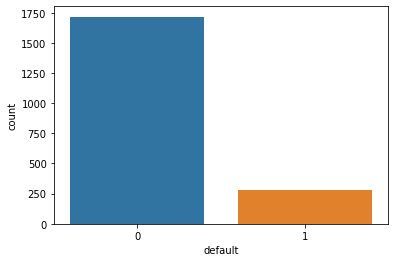

In [ ]:
sns.countplot(x = base_credit['default']);

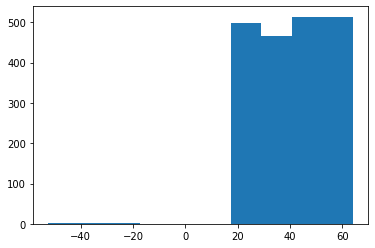

In [ ]:
plt.hist(x = base_credit['age']);

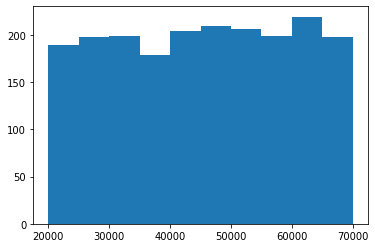

In [ ]:
plt.hist(x = base_credit['income']);

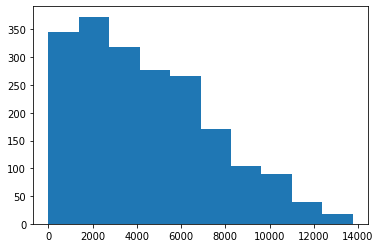

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

### Tratamento de valores inconsistentes

In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,21.666667,48662.128766,-39.046206,5938.876953,0
21,21.666667,48662.128766,-39.046206,5938.876953,0
26,21.666667,48662.128766,-39.046206,5938.876953,0


In [ ]:
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

In [ ]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [ ]:
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit3.loc[base_credit3['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
# Preencher os valores inconsistente manualmente

In [ ]:
# Prencher a média

In [ ]:
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [ ]:
base_credit['age'].mean()

40.80755937840458

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [ ]:
base_credit.age[base_credit.age > 0].mean()

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[base_credit.age < 0, 'age'] = 40.92

In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores faltantes

In [ ]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29.0,59417.805406,NaN,2082.625938,0
30,31.0,48528.852796,NaN,6155.784670,0
31,32.0,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit[base_credit.age.isnull()]

,clientid,income,age,loan,default
28,29.0,59417.805406,NaN,2082.625938,0
30,31.0,48528.852796,NaN,6155.784670,0
31,32.0,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit.age.fillna(base_credit.age.mean(), inplace=True)

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [ ]:
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

In [ ]:
base_credit[base_credit.clientid.isin([29,31,32])]

,clientid,income,age,loan,default
28,29.0,59417.805406,40.927689,2082.625938,0
30,31.0,48528.852796,40.927689,6155.784670,0
31,32.0,23526.302555,40.927689,2862.010139,0


### Divisão entre previsores e classe

In [ ]:
type(base_credit)

pandas.core.frame.DataFrame

In [ ]:
X_credit = base_credit.iloc[:,1:4].values

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
y_credit = base_credit.iloc[:,4].values

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
type(y_credit)

numpy.ndarray

### Escalonamento dos valores

In [ ]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7686687244053383, -1.726414540888992, -1.4600703858567958)

In [ ]:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7230480020499757, 1.7393673928651965, 3.063321061644438)

In [ ]:
X_credit

array([[ 1.4548    ,  1.36538093,  1.20347163],
       [-0.76262955,  0.5426602 ,  0.69680458],
       [ 0.83731921,  1.67417189,  1.17534844],
       ...,
       [-0.07126835, -0.97448519,  0.35439287],
       [-0.11006842,  1.73936739, -0.92725877],
       [ 1.68398852,  1.14917639,  0.96433299]])

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')

In [ ]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualização dos dados

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

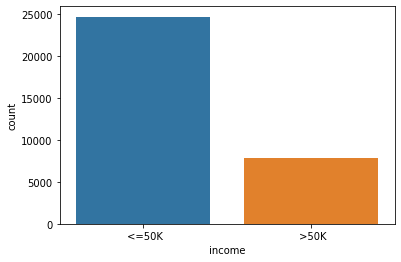

In [ ]:
sns.countplot(x = base_census['income']);

In [ ]:
plt.hist(x = base_census['age']);

In [ ]:
plt.hist(x = base_census['education-num']);

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.drop('income', axis=1).values

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census = base_census.income.values

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de atributos categóricos

### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
teste

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
X_census[:,1] = le.fit_transform(X_census[:,1])
X_census[:,3] = le.fit_transform(X_census[:,3])
X_census[:,5] = le.fit_transform(X_census[:,5])
X_census[:,6] = le.fit_transform(X_census[:,6])
X_census[:,7] = le.fit_transform(X_census[:,7])
X_census[:,8] = le.fit_transform(X_census[:,8])
X_census[:,9] = le.fit_transform(X_census[:,9])
X_census[:,13] = le.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
X_census.shape

(32561, 14)

### OneHotEncoder

In [ ]:
# Carro

# Gol Pálio Uno
#   1     2   3

# Gol   1 0 0
# Pálio 0 1 0
# Uno   0 0 1 # encode

In [ ]:
len(np.unique(base_census['workclass'])) # 1 0 0 0 0 0 0 0, 0 0 0 0 1 0 0 0 0

In [ ]:
len(np.unique(base_census['occupation']))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

In [ ]:
X_census.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()

X_padronizado = stand.fit_transform(X)
X_padronizado

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_padronizado, y, 
                                                        test_size=0.3, 
                                                        random_state=123)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((22792, 108), (9769, 108), (22792,), (9769,))

## Credit data

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
X_credit_treinamento.shape

In [ ]:
y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

## Census

In [ ]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# KNN (K-nearest neighbors ou K-vizinhos mais próximos)

## Base Risco Crédito 40%

In [ ]:
risco_credito = pd.read_csv('/content/risco_credito.csv')
risco_credito.shape

(14, 5)

Separando X e y

In [ ]:
X = risco_credito.drop('risco', axis=1).values
y = risco_credito.risco.values
X, y

(array([['ruim', 'alta', 'nenhuma', '0_15'],
        ['desconhecida', 'alta', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', '15_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
        ['desconhecida', 'baixa', 'adequada', 'acima_35'],
        ['ruim', 'baixa', 'nenhuma', '0_15'],
        ['ruim', 'baixa', 'adequada', 'acima_35'],
        ['boa', 'baixa', 'nenhuma', 'acima_35'],
        ['boa', 'alta', 'adequada', 'acima_35'],
        ['boa', 'alta', 'nenhuma', '0_15'],
        ['boa', 'alta', 'nenhuma', '15_35'],
        ['boa', 'alta', 'nenhuma', 'acima_35'],
        ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

Normalização ou Padronização dos Dados

In [ ]:
# Padronizamos as classes em números inteiros
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])
X_normalizado = X
y_normalizado = y
X_normalizado, y_normalizado

Dividiremos os dados para o treinamento e para o teste

In [ ]:
from sklearn.model_selection import train_test_split

X_risco_credito_treinamento, X_risco_credito_teste, y_risco_credito_treinamento, y_risco_credito_teste = train_test_split(X_normalizado,
                                                                                                                          y_normalizado,
                                                                                                                          test_size=0.3, 
                                                                                                                          random_state=123)
X_risco_credito_treinamento.shape, X_risco_credito_teste.shape, y_risco_credito_treinamento.shape, y_risco_credito_teste.shape

((9, 4), (5, 4), (9,), (5,))

Implementaremos o Algoritmo KNN com a distancia euclidiana

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_risco_credito_treinamento, y_risco_credito_treinamento)

KNeighborsClassifier(metric='euclidean')

In [ ]:
predicao = knn.predict(X_risco_credito_teste)
predicao

array(['alto', 'baixo', 'alto', 'alto', 'baixo'], dtype=object)

In [ ]:
y_risco_credito_teste

array(['moderado', 'alto', 'baixo', 'alto', 'baixo'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_risco_credito_teste, predicao)
acuracia

0.4

## Base Credit data 98%

##### Extraindo a base de **dados**

In [ ]:
credit_data = pd.read_csv('credit_data.csv')
credit_data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
troca_colunas = {
    'clientid': 'Client_id',
    'income': 'Renda',
    'age': 'Idade',
    'loan': 'Emprestimo',
    'default': 'Emprestimo_Ativo'
}

credit_data.rename(columns= troca_colunas, inplace=True)
credit_data.Idade.fillna(credit_data.Idade.mean(), inplace=True)
credit_data

,Client_id,Renda,Idade,Emprestimo,Emprestimo_Ativo
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
credit_data.info()

##### Separando X e y dos dados

In [ ]:
X = credit_data.drop(['Emprestimo_Ativo', 'Client_id'], axis=1).values
y = credit_data.Emprestimo_Ativo.values


##### Normalizando ou Padronização do dados

In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

le = LabelEncoder()
norm = Normalizer()
stand = StandardScaler()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
# X_normalizado = stand.fit_transform(X)
X_normalizado = X

In [ ]:
X_normalizado

array([[1849., 1796., 1730.],
       [ 561., 1305., 1530.],
       [1473., 1965., 1718.],
       ...,
       [ 944.,  453., 1316.],
       [ 921., 1997.,  409.],
       [1983., 1676., 1641.]])

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

##### Dividindo os dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_normalizado, y, random_state=123, test_size=0.3)

X_credit_treinamento.shape, X_credit_teste.shape, y_credit_treinamento.shape, y_credit_teste.shape

((1400, 3), (600, 3), (1400,), (600,))

##### Treinando o algoritmo KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier(metric='euclidean')

In [ ]:
X_joao = [[44311.449262	,28.017167, 5522.786693]]

In [ ]:
predicao = knn.predict(X_credit_teste)


In [ ]:
y_credit_teste

##### Acurácia do algoritmo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

acuracia = accuracy_score(y_credit_teste, predicao)
acuracia

0.98

In [ ]:
print(classification_report(y_credit_teste, predicao))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.98      0.90      0.94       100

    accuracy                           0.98       600
   macro avg       0.98      0.95      0.96       600
weighted avg       0.98      0.98      0.98       600



## Base Census 82.14%

##### Extraindo a base de dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')

base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Visualizando os dados

In [ ]:
base_census.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
base_census.shape

(32561, 15)

In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Traduzindo os dados

In [ ]:
dados_titulo = {
    'age': 'Idade',
    'workclass': 'class_trabalho',
    'final-weight': 'peso_final',
    'education': 'educacao',
    'education-num': 'educacao_num',
    'marital-status': 'estado_civil',
    'occupation': 'ocupacao',
    'relationship': 'relacionamento',
    'race': 'raca',
    'sex': 'sexo',
    'capital-gain': 'ganho_capital',
    'capital-loos': 'capital-loos',
    'hour-per-week': 'horas_por_semana',
    'native-country': 'nacionalidade',
    'income': 'renda'
}

base_census.rename(columns=dados_titulo, inplace=True)
base_census.head()

,Idade,class_trabalho,peso_final,educacao,educacao_num,estado_civil,ocupacao,relacionamento,raca,sexo,ganho_capital,capital-loos,horas_por_semana,nacionalidade,renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
y = base_census.renda
X = base_census.drop('renda', axis=1)

In [ ]:
X.head()

,Idade,class_trabalho,peso_final,educacao,educacao_num,estado_civil,ocupacao,relacionamento,raca,sexo,ganho_capital,capital-loos,horas_por_semana,nacionalidade
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: renda, dtype: object

##### Convertendo os dados em numerais

In [ ]:
X_numeros = X[['Idade', 'peso_final', 'educacao_num', 'ganho_capital',
               'capital-loos', 'horas_por_semana']]

X_numeros

,Idade,peso_final,educacao_num,ganho_capital,capital-loos,horas_por_semana
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [ ]:
X_dummies = pd.get_dummies(X.drop(['Idade','peso_final','educacao_num',
                                   'ganho_capital','capital-loos',
                                   'horas_por_semana'], axis=1))

X_dummies.head()

,class_trabalho_ ?,class_trabalho_ Federal-gov,class_trabalho_ Local-gov,class_trabalho_ Never-worked,class_trabalho_ Private,class_trabalho_ Self-emp-inc,class_trabalho_ Self-emp-not-inc,class_trabalho_ State-gov,class_trabalho_ Without-pay,educacao_ 10th,...,nacionalidade_ Portugal,nacionalidade_ Puerto-Rico,nacionalidade_ Scotland,nacionalidade_ South,nacionalidade_ Taiwan,nacionalidade_ Thailand,nacionalidade_ Trinadad&Tobago,nacionalidade_ United-States,nacionalidade_ Vietnam,nacionalidade_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_final = pd.concat([X_dummies, X_numeros], axis=1)
X_final.head()

##### Normalizando ou Padronizando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
X_padronizado = stand.fit_transform(X_final)

X_padronizado

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

In [ ]:
y.values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### Dividindo os dados de treino e **teste**

In [ ]:
from sklearn.model_selection import train_test_split

X_treino_census, X_teste_census, y_treino_census, y_teste_census = train_test_split(X_padronizado, y,
                                                        test_size=0.3, random_state=123)

X_treino_census.shape, X_teste_census.shape, y_treino_census.shape, y_teste_census.shape

((22792, 108), (9769, 108), (22792,), (9769,))

##### Treinamento do algoritmo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric= 'euclidean')
knn.fit(X_treino_census, y_treino_census)
predicao = knn.predict(X_teste_census)

predicao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
y_teste_census.values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

##### Acurácia do algoritmo

In [ ]:
from sklearn.metrics import accuracy_score


acc = accuracy_score(y_teste_census, predicao) *100
print(f'Na base de dados Census com o algoritmo KNN temos um modelo de acurácia de {acc:.2f}%')

Na base de dados Census com o algoritmo KNN temos um modelo de acurácia de 82.14%


# Naive Bayes

## Risco de Crédito

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()


In [ ]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

X_risco_credito

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
cliente_classe_boa = [0, 0, 1, 2]
cliente_classe_ruim = [2, 0, 0, 0]

previsao = naive_risco_credito.predict([cliente_classe_boa, cliente_classe_ruim])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
np.round((naive_risco_credito.class_prior_ *100), 2)

## Base credit data - 93.80%

In [ ]:

credit_data = pd.read_csv('/content/credit_data.csv')
credit_data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
# 1 Passo - Tratar os dados, limpar

troca_nome_colunas = {'clientid': 'Cliente_id', 'income': 'Renda', 'age': 'Idade', 'loan': 'Emprestimo_valor', 'default': 'Divida'}
dados_credito = credit_data.rename(columns=troca_nome_colunas)
dados_credito = dados_credito.round(2)

dados_credito.Idade.fillna(credit_data.Idade.mean(), inplace=True)

In [ ]:
dados_credito.head()

,Cliente_id,Renda,Idade,Emprestimo_valor,Divida
0,1,66155.93,59.02,8106.53,0
1,2,34415.15,48.12,6564.75,0
2,3,57317.17,63.11,8020.95,0
3,4,42709.53,45.75,6103.64,0
4,5,66952.69,18.58,8770.10,1


In [ ]:
X = dados_credito.drop(['Divida','Cliente_id'], axis=1).values
y = dados_credito.Divida.values
X[0]

array([6.615593e+04, 5.902000e+01, 8.106530e+03])

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gauss = GaussianNB()

model_gauss.fit(X_treino, y_treino)

GaussianNB()

In [ ]:
joao = [[50000, 30, 10000]]
previsao = model_gauss.predict(joao)
previsao

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(previsao, y_teste)
print(f'A acurácia do algoritmo de machine learning foi de {(acc*100):.2f}%')

##Base Census



In [ ]:
census = pd.read_csv('census.csv')

In [ ]:
census.shape

(32561, 15)

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_census = GaussianNB()

In [ ]:
nb_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [ ]:
previsao = nb_census.predict(X_census_teste)
previsao

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

acuracia = accuracy_score(y_census_teste, previsao)
acuracia *100



47.67656090071648

0.4767656090071648

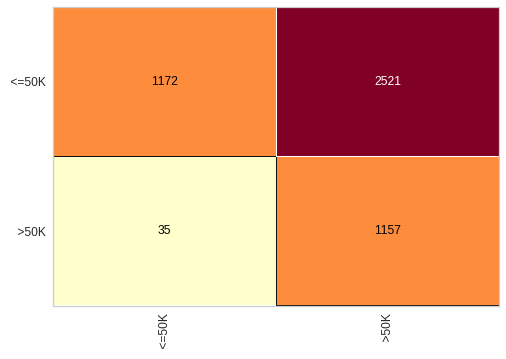

In [ ]:
cm = ConfusionMatrix(nb_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)


In [ ]:
print(classification_report(y_census_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito 20%

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito2, y_risco_credito2 = pickle.load(f)

In [ ]:
y_risco_credito2

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = pd.read_csv('risco_credito.csv')
arvore_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


Convertendo os dados em números

In [ ]:
X_risco_credito = arvore_risco_credito.drop('risco', axis=1).values
y_risco_credito = arvore_risco_credito.risco.values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_risco_credito[:,0] = le.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = le.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = le.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = le.fit_transform(X_risco_credito[:,3])

X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

##### Dividindo os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_risco_credito, y_risco_credito, 
                                                        test_size=0.3, random_state=123)

X_treino.shape, X_teste.shape, y_teste.shape, y_teste.shape

((9, 4), (5, 4), (5,), (5,))

##### Treinando os dados no algoritmo Arvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_treino, y_treino)
predicao = tree.predict(X_teste)
predicao

array(['alto', 'moderado', 'alto', 'alto', 'alto'], dtype=object)

In [ ]:
y_teste

array(['moderado', 'alto', 'baixo', 'alto', 'baixo'], dtype=object)

##### Acurácia do algoritmo

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, predicao)
acc

0.2

In [ ]:
arvore_risco_credito.classes_

In [ ]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

## Base credit data - 98.20%

In [ ]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
credit_data = pd.read_csv('credit_data.csv')

credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [ ]:
X_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

In [ ]:
arvore_credit.

array([0, 1])

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

## Base census - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
#cm = ConfusionMatrix(arvore_credit) corrigido 10/04/2021
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Base credit data - 98.40%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)


In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(X_credit_teste)


In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

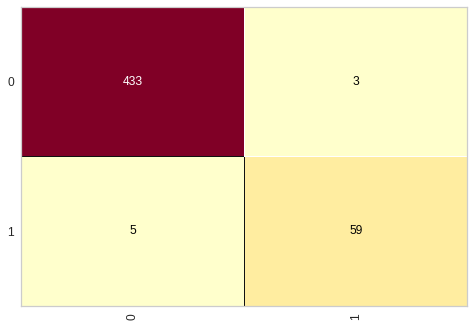

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
y_census_treinamento

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Regras

In [ ]:
!pip install Orange3

In [ ]:
import Orange

## Base risco de crédito

In [ ]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.domain

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

In [ ]:
base_risco_credito.domain.class_var.values

In [ ]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

## Base credit data - 97.40%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [ ]:
base_dividida

In [ ]:
base_dividida[0]

In [ ]:
base_dividida[1]

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes)

## Base census - 78.90% (executado na interface gráfica do Orange)

# Classificador base - Majority learner

## Base credit data - 85.85%

In [ ]:
base_credit = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)

In [ ]:
for registro in base_credit:
  print(registro.get_class())

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

In [ ]:
1717 / 2000

## Base census - 75.91%

In [ ]:
base_census = Orange.data.Table('census_regras.csv')

In [ ]:
base_census.domain

In [ ]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

In [ ]:
24720 / (24720 + 7841)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.60%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 82.90%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

## Base risco de crédito

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:  
  X_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
X_risco_credito

In [ ]:
y_risco_credito # 2, 7, 11

In [ ]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [ ]:
X_risco_credito

In [ ]:
y_risco_credito

In [ ]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

In [ ]:
logistic_risco_credito.intercept_

In [ ]:
logistic_risco_credito.coef_

In [ ]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

## Base credit data - 94.60%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
logistic_credit.intercept_

In [ ]:
logistic_credit.coef_

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 84.95%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# SVM

In [ ]:
from sklearn.svm import LinearSVC

## Base credit data - 98.80%

#### Importando os dados

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

X_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
base_credit_data = pd.read_csv('credit_data.csv')


Visualizando os dados

In [ ]:
base_credit_data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


#### Traduzindo os dados

In [ ]:
troca = {
    'clientid': 'Cliente_id',
    'income': 'Renda',
    'age': 'Idade',
    'loan': 'Emprestimo',
    }

credit_base = base_credit_data.rename(columns=troca)

In [ ]:
credit_base

###### Vendo inconsistencias, atributos nulos e tratamentos


In [ ]:
credit_base.info() # Temos 3 atributos nulos em idade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cliente_id  2000 non-null   int64  
 1   Renda       2000 non-null   float64
 2   Idade       1997 non-null   float64
 3   Emprestimo  2000 non-null   float64
 4   default     2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [ ]:
credit_base.describe()  # Temos numeros negativos para idade 

,Cliente_id,Renda,Idade,Emprestimo,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


###### Tratando os dados nulos

In [ ]:
credit_base.isna().sum()

Cliente_id    0
Renda         0
Idade         3
Emprestimo    0
default       0
dtype: int64

In [ ]:
credit_base[credit_base.Idade.isna()]

,Cliente_id,Renda,Idade,Emprestimo,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
media_idade = credit_base[credit_base.Idade > 0]['Idade'].mean()
media_idade

40.92770044906149

In [ ]:
credit_base.fillna(media_idade, inplace=True)

In [ ]:
credit_base[credit_base.Idade.isna()]

,Cliente_id,Renda,Idade,Emprestimo,default


In [ ]:
credit_base.head()

,Cliente_id,Renda,Idade,Emprestimo,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


###### Tratando os dados negativos

In [ ]:
credit_base[credit_base.Idade < 0]['Idade']

15   -28.218361
21   -52.423280
26   -36.496976
Name: Idade, dtype: float64

In [ ]:
credit_base.loc[[15,21,26], 'Idade'] = media_idade

In [ ]:
credit_base[credit_base.Idade < 0]['Idade']

Series([], Name: Idade, dtype: float64)

In [ ]:
credit_base.head()

,Cliente_id,Renda,Idade,Emprestimo,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


### Tratando os dados

In [ ]:
credit_base.head()

,Cliente_id,Renda,Idade,Emprestimo,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

X_normalizado = stand.fit_transform(credit_base.drop(['default', 'Cliente_id'],axis=1))
y = credit_base.default.values

### Dividir os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=1)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1400, 3), (600, 3), (1400,), (600,))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_credit = SVC(C=2, kernel='rbf', random_state=1,)  # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svm_credit.fit(X_treino, y_treino)
predicao_svc = svm_credit.predict(X_teste)
acc_svm = accuracy_score(y_teste, predicao_svc)
acc_svm

0.9866666666666667

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy',random_state=1)

random_forest.fit(X_treino, y_treino)
predicao_random_forest = random_forest.predict(X_teste)
acc_rfc = accuracy_score(y_teste, predicao_random_forest)
acc_rfc

0.9833333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1, criterion='entropy')

tree.fit(X_treino, y_treino)
predicao_tree = tree.predict(X_teste)
acc_tree = accuracy_score(y_teste, predicao_tree)
acc_tree

0.9883333333333333

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_treino, y_treino)
predicao_knn = knn.predict(X_teste)
acc_knn = accuracy_score(y_teste, predicao_knn)
acc_knn

0.9733333333333334

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB(binarize=0)

nb.fit(X_treino, y_treino)
predicao_nb = nb.predict(X_teste)
acc_nb = accuracy_score(y_teste, predicao_nb)
acc_nb

0.8433333333333334

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## Base census - 85.07%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

## Base credit data - 99.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
(3 + 1) / 2

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

In [ ]:
y_credit_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

## Base census - 81.53%

In [ ]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
(108 + 1) / 2

In [ ]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
import pickle

with open ('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)

X_credit.shape

(2000, 3)

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

y_credit.shape

(2000,)

In [ ]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [ ]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

### Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado *100,'%')

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
98.3 %


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parametros = {'n_estimators': [10,40,100,150], 'criterion': ['gini', 'entropy'],
              'min_samples_split': [2,5,10], 'min_samples_leaf': [1,5,10]}


grid_search_random_florest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search_random_florest.fit(X_credit, y_credit)
melhor_parametro = grid_search_random_florest.best_params_
resultado = grid_search_random_florest.best_score_


In [ ]:
print(melhor_parametro)
print(resultado*100,'%')

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
98.85 %


### Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parametros = {'n_neighbors': [3,5,10,20], 'p': [1,2]}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search_knn.fit(X_credit, y_credit)
knn_melhor_param = grid_search_knn.best_params_
knn_melhor_resultado = grid_search_knn.best_score_


In [ ]:
print(knn_melhor_param)
print(knn_melhor_resultado*100,'%')

{'n_neighbors': 20, 'p': 1}
98.00000000000001 %


### Regressão logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
from sklearn.svm import SVC

grid_search = GridSearchCV(estimator= SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


### Redes neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado*100)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
99.75000000000001


## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
10 * 30

300

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logisticas = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    # Arvore de Decisão
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,
                                    min_samples_split=5, splitter='best')
  
    scores = cross_val_score(arvore, X_credit, y_credit, cv= kfold)
    resultados_arvore.append(scores.mean())

    # Random Forest
    random_forest = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,
                                           min_samples_split=2,n_estimators=100)
    
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    # KNN
    knn = KNeighborsClassifier(n_neighbors=20, p=1)
    scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    # Regressão Logistica
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
    resultados_logisticas.append(scores.mean())

    # SVM
    svm = SVC(C=1.5, kernel='rbf', tol=0.001)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())
   
   # Rede Neural
    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())

In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logisticas,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9870,0.9800,0.9475,0.9835,0.9965
1,0.9845,0.9860,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9870,0.9800,0.9470,0.9835,0.9985
3,0.9870,0.9875,0.9800,0.9460,0.9845,0.9970
4,0.9885,0.9885,0.9810,0.9465,0.9855,0.9970
5,0.9885,0.9880,0.9785,0.9465,0.9835,0.9975
6,0.9880,0.9885,0.9800,0.9470,0.9840,0.9970
7,0.9875,0.9880,0.9805,0.9480,0.9845,0.9965
8,0.9860,0.9890,0.9810,0.9465,0.9820,0.9965
9,0.9870,0.9875,0.9810,0.9465,0.9830,0.9975


In [ ]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987150,0.987267,0.980200,0.946950,0.983983,0.997100
std,0.001839,0.001318,0.001270,0.000687,0.001141,0.000563
min,0.982000,0.984000,0.977500,0.945500,0.982000,0.996000
25%,0.986000,0.986500,0.979625,0.946500,0.983500,0.997000
50%,0.987250,0.987500,0.980000,0.947000,0.984000,0.997000
75%,0.988375,0.988000,0.981000,0.947500,0.984500,0.997500
max,0.990500,0.990000,0.983500,0.948500,0.987000,0.998500


In [ ]:
resultados.var()

Arvore           3.381897e-06
Random forest    1.736782e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.301437e-06
Rede neural      3.172414e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.186293
Random forest    0.133487
KNN              0.129601
Logistica        0.072517
SVM              0.115937
Rede neural      0.056488
dtype: float64

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [ ]:
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logisticas), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9691017866134644, pvalue=0.5148987174034119),
 ShapiroResult(statistic=0.9807904958724976, pvalue=0.8461654186248779),
 ShapiroResult(statistic=0.9244088530540466, pvalue=0.03495403751730919),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.96373051404953, pvalue=0.384358674287796),
 ShapiroResult(statistic=0.8792633414268494, pvalue=0.0027115962002426386))

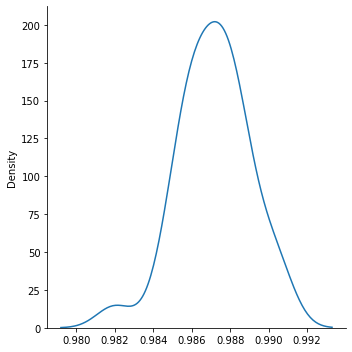

In [ ]:
sns.displot(resultados_arvore, kind='kde');

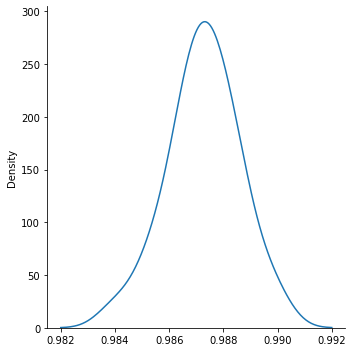

In [ ]:
sns.displot(resultados_random_forest, kind='kde');

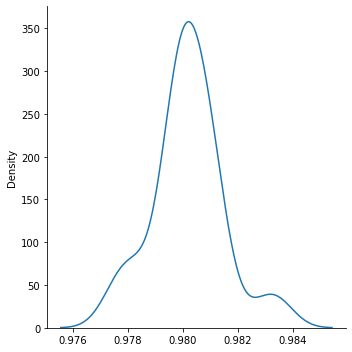

In [ ]:
sns.displot(resultados_knn, kind='kde');

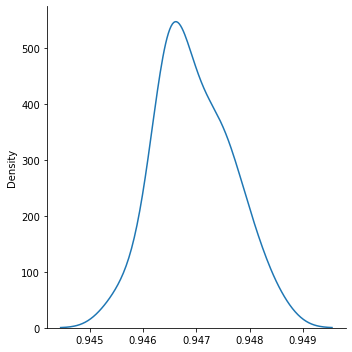

In [ ]:
sns.displot(resultados_logisticas, kind='kde');

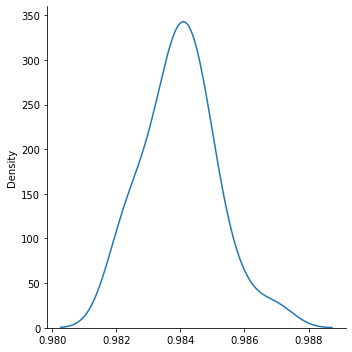

In [ ]:
sns.displot(resultados_svm, kind='kde');

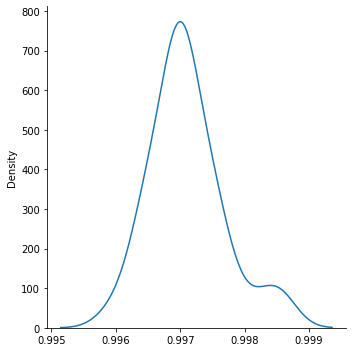

In [ ]:
sns.displot(resultados_rede_neural, kind='kde');

## Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_,p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logisticas, resultados_svm, resultados_rede_neural)
p

1.442381349467455e-193

In [ ]:
alpha = 0.05

if p <= alpha:
    print('Hipótese Nula rejeitada. Dados são diferentes')
else:
    print('Hipótese Nula alternativa rejeitada. Dados são iguais')

Hipótese Nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logisticas, resultados_svm, resultados_rede_neural]),
                        'algoritmo': ['arvore', 'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                      'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                      'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}


In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)

resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9970,rede_neural
176,0.9975,rede_neural
177,0.9960,rede_neural
178,0.9970,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison


In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])


In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0069 0.001 -0.0079  -0.006   True
       arvore     logistica  -0.0402 0.001 -0.0411 -0.0393   True
       arvore random_forest   0.0001   0.9 -0.0008   0.001  False
       arvore   rede_neural   0.0099 0.001   0.009  0.0109   True
       arvore           svm  -0.0032 0.001 -0.0041 -0.0023   True
          knn     logistica  -0.0333 0.001 -0.0342 -0.0323   True
          knn random_forest   0.0071 0.001  0.0062   0.008   True
          knn   rede_neural   0.0169 0.001   0.016  0.0178   True
          knn           svm   0.0038 0.001  0.0029  0.0047   True
    logistica random_forest   0.0403 0.001  0.0394  0.0412   True
    logistica   rede_neural   0.0501 0.001  0.0492  0.0511   True
    logistica           svm    0.037 0.001  0.0361  0.0379   True
random_for

In [ ]:
resultados.mean()

Arvore           0.987150
Random forest    0.987267
KNN              0.980200
Logistica        0.946950
SVM              0.983983
Rede neural      0.997100
dtype: float64

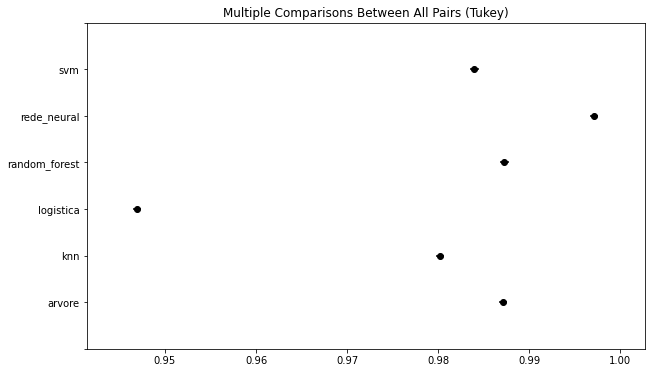

In [ ]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [ ]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit = np.concatenate([X_credit_treinamento, X_credit_teste], axis=0)
y_credit = np.concatenate([y_credit_treinamento, y_credit_teste], axis=0)

y_credit.shape, X_credit.shape

((2000,), (2000, 3))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

In [ ]:
classificador_random_arvore = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,
                                                     min_samples_split=2,n_estimators=100)
classificador_random_arvore.fit(X_credit, y_credit)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_random_arvore, open('arvore_random_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [ ]:
rede_neural = pickle.load(open('/content/rede_neural_finalizado.sav', 'rb'))
arvore_random = pickle.load(open('/content/arvore_random_finalizado.sav', 'rb'))
arvore = pickle.load(open('/content/arvore_finalizado.sav', 'rb'))

In [ ]:
novo_registro = X_credit[199]
novo_registro

array([-0.04105696,  0.91546375, -0.61408136])

In [ ]:
novo_registro = novo_registro.reshape(1,-1)
novo_registro.shape

(1, 3)

In [ ]:
rede_neural.predict(novo_registro)

array([0])

In [ ]:
arvore_random.predict(novo_registro)

array([0])

In [ ]:
arvore.predict(novo_registro)

array([0])

# Combinação de classificadores

In [ ]:
X_credit[1999]

array([-1.03572293, -0.93978122,  0.04244312])

In [ ]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore_random = arvore_random.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore_random[0], resposta_arvore[0]

(1, 1, 1)

In [ ]:
if resposta_rede_neural[0] == 0 & resposta_arvore_random[0] == 0 & resposta_arvore[0] == 0:
    print('Emprestimo Liberado, Cliente Possível Pagador')
elif resposta_rede_neural[0] == 1 | resposta_arvore_random[0] == 0 | resposta_arvore[0] == 0:
    print('Emprestimo Liberado, mas com análise, possivel não pagador')
else:
    print('Emprestimo NÃO liberado!!! Possivel não pagador ...')

Emprestimo NÃO liberado!!! Possivel não pagador ...


In [ ]:
rede_neural_peso = 6
arvore_radom_peso = 2
arvore_peso = 2
peso_total = 0

if resposta_rede_neural[0] == 0:
    peso_total += rede_neural_peso
if resposta_arvore_random[0] == 0:
    peso_total += arvore_radom_peso
if resposta_arvore[0] == 0:
    peso_total += arvore_peso

if peso_total >= 8:
    print(f'Peso: {peso_total} de 10.')
    print('Emprestimo Liberado !!')
else:
    print('Emprestimo NÃO liberado!! Possivel não pagador ... ') 

Emprestimo NÃO liberado!! Possivel não pagador ... 


# Rejeição de classificadores

In [ ]:
novo_registro = X_credit[1999]

novo_registro = novo_registro.reshape(1,-1)

novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [ ]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore_random = arvore_random.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)

In [ ]:
resposta_rede_neural[0], resposta_arvore_random[0], resposta_arvore[0]

(1, 1, 1)

In [ ]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9999470593598314

In [ ]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [ ]:
probabilidade_random_arvore = arvore_random.predict_proba(novo_registro)
confianca_random_arvore = probabilidade_random_arvore.max()
confianca_random_arvore

0.96

In [ ]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_random_arvore >= confianca_minima:
  algoritmos += 1
  if arvore_random[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o empréstimo, baseado em 1 algoritmos


# Redução de dimensionalidade

## Preparacão da base de dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')
base_census

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census[0]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, X_census_teste.shape

## PCA (Principal component analysis)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_testes_pca = pca.transform(X_census_teste)

In [ ]:
X_census_treinamento_pca.shape, X_census_testes_pca.shape

In [ ]:
X_census_treinamento

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_census_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
random_forest_census_pca.fit(X_census_treinamento_pca, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_pca.predict(X_census_testes_pca)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

## Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=8, kernel='rbf')
X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [ ]:
X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

In [ ]:
X_census_treinamento_kpca

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_kpca = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_kpca.predict(X_census_teste_kpca)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

## LDA (Linear discriminant analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 8)

In [ ]:
X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento)
X_census_teste_lda = lda.transform(X_census_teste)

In [ ]:
X_census_treinamento_lda.shape, X_census_teste_lda.shape

In [ ]:
X_census_treinamento_lda

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_lda = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_lda.fit(X_census_treinamento_lda, y_census_treinamento)

In [ ]:
previsoes = random_forest_census_lda.predict(X_census_teste_lda)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

# Detecção de outliers

## Boxplot

In [ ]:
base_credit = pd.read_csv('credit_data.csv')
base_credit

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.dropna(inplace=True)

In [ ]:
base_credit.isnull().sum()

In [ ]:
1997 / 2

In [ ]:
# Outliers idade
grafico = px.box(base_credit, y = 'age')
grafico.show()

In [ ]:
outliers_age = base_credit[base_credit['age'] < 0]
outliers_age

In [ ]:
# Outliers loan
grafico = px.box(base_credit, y='loan')
grafico.show()

In [ ]:
outliers_loan = base_credit[base_credit['loan'] > 13300]
outliers_loan

## Gráfico de dispersão

In [ ]:
# Income x age
grafico = px.scatter(x = base_credit['income'], y = base_credit['age'])
grafico.show()

In [ ]:
# Income x loan
grafico = px.scatter(x = base_credit['income'], y = base_credit['loan'])
grafico.show()

In [ ]:
# Age x loan
grafico = px.scatter(x = base_credit['age'], y = base_credit['loan'])
grafico.show()

In [ ]:
base_census = pd.read_csv('census.csv')
base_census

In [ ]:
# Age x final weight
grafico = px.scatter(x = base_census['age'], y = base_census['final-weight'])
grafico.show()

## Biblioteca PyOD

- Documentação: https://pyod.readthedocs.io/en/latest/#

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN

In [ ]:
base_credit.head(1)

In [ ]:
detector = KNN()
detector.fit(base_credit.iloc[:,1:4])

In [ ]:
previsoes = detector.labels_
previsoes

In [ ]:
np.unique(previsoes, return_counts=True)

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [ ]:
outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = base_credit.iloc[outliers,:]
lista_outliers